# Sputtering Simulation

In [64]:
# Libraries for data
import numpy as np
import pandas as pd

# Libraries for graphs and animation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [65]:
# Visualization format
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

In [67]:
# Magic command for context
%matplotlib notebook

# Distribución de energía de Átomo de Titanio. 
### Método MonteCarlo

In [68]:
# Number of points used
points = 100000

# Energy variable as a vector
energy = np.linspace(0,35,points)

# Evaluate the function of energy that has the distribution  
func_energy = 100*energy/(energy+4)**3

# Generate random variables ("a" and "b" corresponding to "energy" and "func_energy")
random_1,random_2 = np.random.uniform(0,max(energy),points), np.random.uniform(0,max(func_energy),points)

<IPython.core.display.Javascript object>


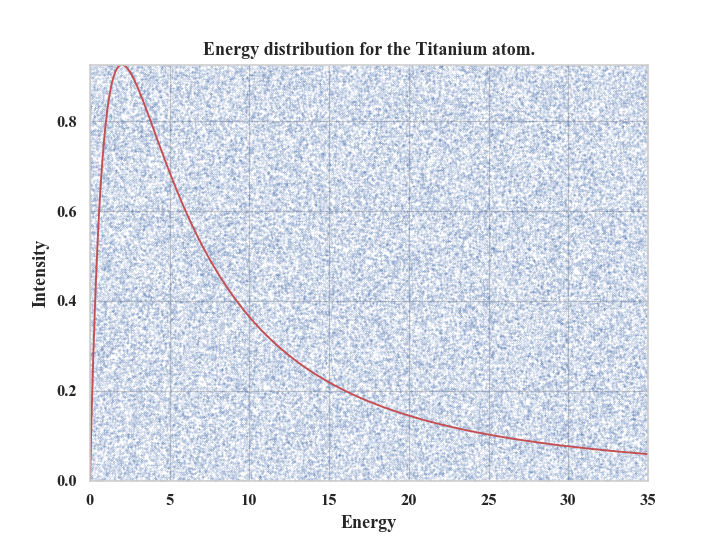

In [69]:
# Create a figure to plot
plt.figure()
plt.xlabel("Energy")
plt.ylabel("Intensity")
plt.title("Energy distribution for the Titanium atom.")
plt.ylim(min(func_energy),max(func_energy))
plt.xlim(min(energy),max(energy))


# Graph of the points 
plt.scatter(random_1,random_2,s=.01)
plt.plot(energy,func_energy, c='r')
plt.show()

In [71]:
# Histogram Bars
bins = 100
lenght = np.max(energy)/bins

# Bars creation
bars = np.arange(0,35,lenght)+lenght

# Histogram Initialization
histogram = np.zeros(len(bars))

# Histogram generated with the montecarlo conditons
for position in range(len(random_1)):
    flag = False
    if random_2[position]<=100*random_1[position]/(random_1[position]+4)**3:
        flag = True
    for i in range(bins):
        if i == 0:
            if random_1[position] < bars[i] and flag == True:
                histogram[0] += 1
                break
        else:
            if random_1[position] > bars[i-1] and random_1[position] < bars[i] and flag == True:
                histogram[i] += 1
                break

<IPython.core.display.Javascript object>


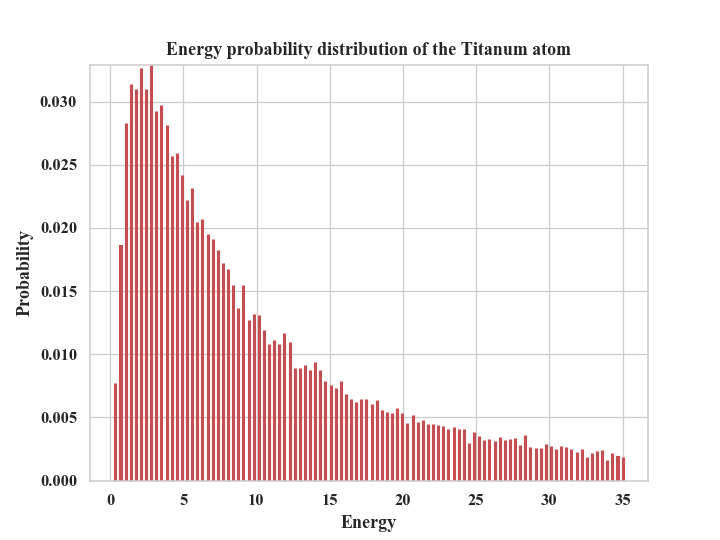

Text(0.5, 1.0, 'Energy probability distribution of the Titanum atom')

In [72]:
# Histogram plotting
plt.figure()
histogram_prob = histogram/histogram.sum()
plt.bar(bars, histogram_prob, width = 0.001, linewidth = 2, edgecolor='r')
plt.ylim(0,max(histogram_prob))

plt.xlabel("Energy")
plt.ylabel("Probability")
plt.title("Energy probability distribution of the Titanum atom")

#### Yield (With probability determines the number of atoms that will be obtained from the sputter proccess considering the Argon Ions)

In [36]:
# Number of Argon Ions
Ar=int(input())

# Yield value
# for a specific case, maintain an unitary yield value
y=1

# Number of used titanium particles are the argon particles times the yield 
Ti=Ar*y

2000


# Átomo erosionado
### Determinar primeras características de la partícula y Generar una particula con velocidad y angulo permitidos en una posición inicial

In [37]:
# Function to generate a particle with an allowed speed and an angle, with initial condition

def create_particle(bars,histogram,lenght,blancomin,blancomax):
    #To select the value of speed from the histogram
    velocity = np.random.choice(bars,p=histogram)
    
    # Giving a specific value of the velocity with a uniform distribution
    particle_v = np.random.uniform(low=(velocity-lenght),high=velocity)
    
    #Giving a specific value for the angle from 0 to pi
    particle_a = np.random.uniform(0, np.pi)
    angle = np.random.uniform(0,2*np.pi)
    
    #Defining the initial position of the value which got off from the target
    posx = np.random.uniform(blancomin,blancomax)
    posy = 0
    posz = np.random.uniform(blancomin,blancomax)
    
    # Save the three positions of the particle in a vector
    pos = [posx,posy,posz]
    
    # All the information of the particle can be saved in a list
    particle = [particle_v,particle_a,pos, angle]
    return particle

<IPython.core.display.Javascript object>


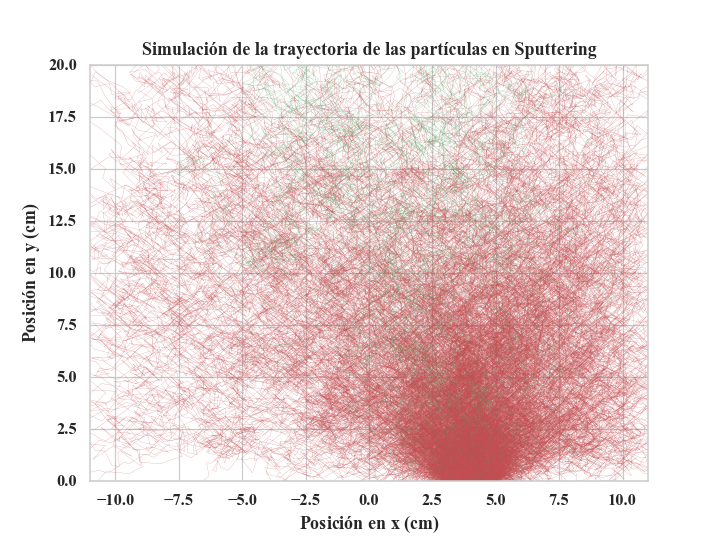

Porcentaje de partículas que incidieron en el sustrato: 2.3%


In [44]:
# tarjet
blancomin = 3
blancomax = 5
particlesTi = [create_particle(bars,histogram_prob,lenght,blancomin, blancomax) for i in range(Ti)]
countgood = 0
countbad = 0

#Dimensiones de camara
camxmin = -11
camxmax = 11

camzmin = -11
camzmax = 11

camymin = 0
camymax = 20

# Figure
plt.figure()

# Save Results 
results_x = []
results_y = []
results_z = []
results_c = []

for particle in particlesTi:
    objective=False
    #Definir la posicion
    vectorposx = []
    vectorposy = []
    vectorposz = []

    posx = particle[2][0]
    posy = particle[2][1]
    posz = particle[2][2]

    vectorposx.append(posx)
    vectorposy.append(posy)
    vectorposz.append(posz)
    operations = True


    """ESTE ES EL CAMINO MEDIO DE LAS PARTICULAS PERO NO ESTAMOS TOMANDO EL REAL AUN..."""
    recorrido=.1

    #Determinar si colisiona la particula dependiendo de un valor "tresh" de umbral
    tresh = 1/np.exp(1)


    while operations==True:
        #Determinar si colisiona la particula dependiendo de un valor "tresh" de umbral
        collision = np.random.uniform(0,1)

        if collision < tresh:
            collisiontrue = True
        else: 
            collisiontrue = False

        #Determinar la mecánica de la partícula cuando no colisiona
        if collisiontrue == False:
            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3])
            posy = posy + recorrido*np.sin(particle[1])
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3])
            pos = [posx,posy,posz]

        #Determinar la mecánica de la partícula cuando colisiona
        elif collisiontrue == True:
            
            modificacion = 7*recorrido
            #particle[1]=particle[1]+.7*np.random.uniform(0,2*np.pi)

            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posy = posy + recorrido*np.sin(particle[1]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            pos = [posx,posy,posz]
        #Evaluate if the particle is still in the box
        if abs(posx)>camxmax:
            operations=False
        elif abs(posz)>camzmax:
            operations=False
        elif posy<camymin:
            operations=False
        elif (posy>20) and (abs(posx)>5) and (abs(posx)>5):
            operations=False
        elif (posy>20) and (abs(posx)>5) and (abs(posx)<5):
            operations=False    
        elif (posy>20) and (abs(posx)>5) and (abs(posx)<5):
            operations=False  
        elif (posy>20) and (abs(posx)<5) and (abs(posz)<5):
            operations=False
            objective=True
                
        vectorposx.append(posx)
        vectorposy.append(posy)
        vectorposz.append(posz)
        
        particle[2]=pos
        
    if objective == True:
        color = 'g'
        #Cuenta de particulas que llegan al sustrato
        countgood += 1
        #plt.axes(projection='3d').plot(vectorposx, vectorposz, vectorposy)
    elif objective == False:
        #Cuenta de particulas que no llegan al sustrato
        countbad += 1
        color = 'r'
    plt.plot(vectorposx,vectorposy,c=color,linewidth=.1)

    # Result vectors
    results_x.append(vectorposx)
    results_y.append(vectorposy)
    results_z.append(vectorposz)
    results_c.append(color)

plt.xlim(camxmin,camxmax)
plt.ylim(camymin,camymax)

#plt.axes(projection='3d').plot([-5,5], [20,20],c= 'k', linewidth=10, label="Sustrato")
#plt.plot([blancomin,blancomax] ,[0,0]  ,c= 'g', linewidth=5, label="Blanco")

plt.xlabel("Posición en $x$ (cm)")
plt.ylabel("Posición en $y$ (cm)")
plt.title("Simulación de la trayectoria de las partículas en Sputtering")

#Cuenta total
counttotal=countgood+countbad
total_particles_sub_hit=countgood/counttotal
print(f"Porcentaje de partículas que incidieron en el sustrato: {total_particles_sub_hit*100}%")

In [22]:
#INFORMACIONE EXTRA... QUE NO USAMOS...
#Se usa con la distribucion Maxwell-Boltzman, pero vamos a utilizar la energía promedio. 
k=1.380648813*10**(-23)
t=300
energyAr=3/2*k*t/(1.6*10**(-19))

<IPython.core.display.Javascript object>


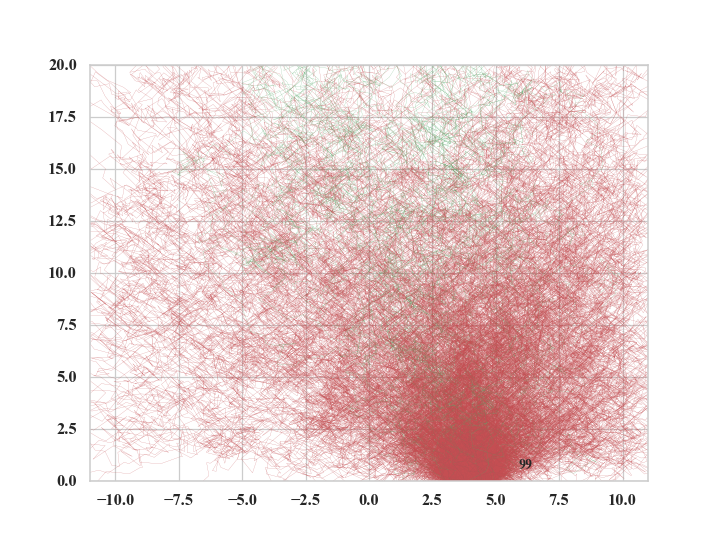

In [62]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(camxmin,camxmax)
plt.ylim(camymin,camymax)
text = plt.text(5.9,.58,f' 0', fontsize=9)
#plotter = ax1.plot(results_x[0][:-3],results_y[0][:-3], c='k')


#def a2(i):
#    plotter.set_data(results_x[0][0:i], results_y[0][0:i])


mult = 20
def ani(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    text.set_text(f'{i}')
    for j in range(mult):
        plot = ax.plot(results_x[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1)

anim = animation.FuncAnimation(fig, ani, frames=int(Ti/mult), repeat=False)